In [1]:
import pandas as pd
import numpy as np
import pandasgui as gui
import networkx as nx
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.lines as mlines
import matplotlib as mpl  

mpl.rc('font',family='Times New Roman')
# mpl.rc('font',family='Arial')

In [2]:
df_pairs = pd.read_excel('../Data/DPN_Pairs.xlsx')
df_pairs

,Prior diagnosis (ICD-10 code),Prior diagnosis (full term),Later diagnosis (ICD-10 code),Prior diagnosis (full term).1,Count,Relative risk,p_value,Male relative risk,Female relative risk,Female to male relative risk ratio
0,N03,Chronic nephritic syndrome,N02,Recurrent and persistent haematuria,131,10.080660,1.486758e-77,12.607648,8.501891,0.674344
1,C64,"Malignant neoplasm of kidney, except renal pelvis",C34,Malignant neoplasm of bronchus and lung,26,7.479254,7.458037e-10,4.996531,10.151786,2.031767
2,H35,Other retinal disorders,H30,Chorioretinal inflammation,322,5.574992,1.871953e-122,5.818775,5.205537,0.894610
3,D68,Other coagulation defects,K04,Diseases of pulp and periapical tissues,30,4.489868,2.453589e-06,4.195125,4.803026,1.144907
4,D14,Benign neoplasm of middle ear and respiratory ...,J90,"Pleural effusion, NEC",38,4.390567,1.311005e-08,3.674920,4.463013,1.214452
...,...,...,...,...,...,...,...,...,...,...
5731,G40,Epilepsy,Q04,Other congenital malformations of brain,26,13.518334,7.560423e-16,13.874672,11.192864,0.806712
5732,N89,Other noninflammatory disorders of vagina,N90,Other noninflammatory disorders of vulva and p...,30,5.538038,1.549226e-08,0.000000,3.493089,0.000000
5733,P38,Omphalitis of newborn with or without mild hae...,B34,Viral infection of unspecified site,76,5.719176,1.915671e-27,4.530370,6.734353,1.486491
5734,G81,Hemiplegia,G80,Cerebral palsy,39,30.590645,1.465639e-38,25.979484,30.312491,1.166786


그래프 생성
* 방향 그래프

In [3]:
G = nx.DiGraph()
type(G)

networkx.classes.digraph.DiGraph

In [4]:
prev_diagnosis = np.array(df_pairs['Prior diagnosis (ICD-10 code)'])
next_diagnosis = np.array(df_pairs['Later diagnosis (ICD-10 code)'])

print(prev_diagnosis)
print('\n')
print(next_diagnosis)

['N03' 'C64' 'H35' ... 'P38' 'G81' 'I65']


['N02' 'C34' 'H30' ... 'B34' 'G80' 'I67']


In [5]:
G.add_edges_from([(prev, next) for prev, next in zip(prev_diagnosis, next_diagnosis)])
print(G.edges())

[('N03', 'N02'), ('N03', 'N00'), ('N03', 'N19'), ('N03', 'I15'), ('N03', 'I12'), ('N03', 'N05'), ('N03', 'N18'), ('N03', 'N04'), ('N02', 'N03'), ('N02', 'N05'), ('N02', 'N28'), ('N02', 'N08'), ('N02', 'C67'), ('N02', 'D30'), ('N02', 'N04'), ('N02', 'N06'), ('N02', 'D41'), ('N02', 'C64'), ('C64', 'C34'), ('C64', 'N18'), ('C64', 'N28'), ('C64', 'C78'), ('C64', 'D41'), ('C64', 'D30'), ('C64', 'C79'), ('C64', 'C65'), ('C64', 'C67'), ('C34', 'D14'), ('C34', 'J93'), ('C34', 'F05'), ('C34', 'J84'), ('C34', 'A16'), ('C34', 'B90'), ('C34', 'I46'), ('C34', 'C78'), ('C34', 'C16'), ('C34', 'D38'), ('C34', 'A41'), ('C34', 'G30'), ('C34', 'J44'), ('C34', 'C22'), ('C34', 'J90'), ('C34', 'J85'), ('C34', 'J98'), ('C34', 'A15'), ('C34', 'C20'), ('C34', 'C79'), ('C34', 'D02'), ('C34', 'C39'), ('C34', 'J96'), ('C34', 'C71'), ('C34', 'L89'), ('C34', 'C77'), ('C34', 'J47'), ('C34', 'C61'), ('C34', 'C80'), ('C34', 'J43'), ('C34', 'C18'), ('H35', 'H30'), ('H35', 'P22'), ('H35', 'P07'), ('H35', 'P59'), ('H35',

특징적 관계를 갖고 있는 진단 쌍의 개수 구하기
- unidirectional: 단방향쌍
- lop-sided bidirectonal: 편향된 양방향쌍
- even bidirectonal: 균형있는 양방향쌍

In [6]:
# 특징적 관계를 가지고 있는 진단 쌍의 개수 계산 함수
def relationshipBtwDP(edges):
    unidir_pairs = []  # Pairs of unidirectional releationships 
    lopsidedbir_pairs = [] # Pairs of lop-sided bidirectional relationships
    evenbidir_pairs = [] # Pairs of even bidirectional relationships

    computation_complete = [] # List of pairs for which computations have been completed
    
    for prev, next in edges: # The type of elements of edges is tuple: [(D1, D2), (D4, D3), ...]
        
        ### if reverse pair do not exist
        if (next, prev) not in edges: 
            unidir_pairs.append((prev, next))
            continue
        
        ### if reverse pair exists
        # Do not compute if pair is already computed
        if (next, prev) in computation_complete:
            continue
        
        # If pair is not computed
        computation_complete.append((prev, next))
        
        # Get Relative risk for pairs and reverse pair
        pairs_rr = df_pairs.loc[(df_pairs['Prior diagnosis (ICD-10 code)'] == prev) & (df_pairs['Later diagnosis (ICD-10 code)'] == next), 'Relative risk'].values[0]
        pairs_rev_rr = df_pairs.loc[(df_pairs['Prior diagnosis (ICD-10 code)'] == next) & (df_pairs['Later diagnosis (ICD-10 code)'] == prev), 'Relative risk'].values[0]
        
        differ = max(pairs_rr, pairs_rev_rr) / min(pairs_rr, pairs_rev_rr) # Compute difference value
        
         # Difference value is more than twice
        if differ >= 2:
            lopsidedbir_pairs.append((prev, next))
        else:
            evenbidir_pairs.append((prev, next))
            
    return unidir_pairs, lopsidedbir_pairs, evenbidir_pairs

uniDirPairs, lopSidedBiDirPairs, evenBiDirPairs = relationshipBtwDP(G.edges())

print('unidirectional: ', len(uniDirPairs))
print('lop-sided bidirectional: ', len(lopSidedBiDirPairs))
print('even bidirectional: ', len(evenBiDirPairs))
        

unidirectional:  2470
lop-sided bidirectional:  301
even bidirectional:  1332


노드, 간선의 속성 추가
* 노드
    * 크기: 유병률(보충표에는 이전 진단이 발생한 횟수를 알 수 없으므로 실습에서는 PageRank 값을 계산하여 노드 크기를 설정)
    * 색: ICD-10 카테고리
* 간선
    * 두께: RR
    * 색: RR ratio(by sex)

노드 색 설정: 17개의 카테고리

![Alt text](image.png)

In [7]:
ICD_CODE = sorted(list(G.nodes()))
# main_icd_cat = [chr(i) for i in range(ord('A'), ord('Q')+1)]

A00_B99 = [code for code in ICD_CODE if 'A' in code or 'B' in code] # Infectious and parasitic
C00_D48 = [code for code in ICD_CODE if 'C' in code or ('D' in code and int(code[1]) < 5)] # Neoplasms
D50_D89 = [code for code in ICD_CODE if 'D' in code and int(code[1])>=5] #Blood, blood-forming organs & immune
E00_E90 = [code for code in ICD_CODE if 'E' in code] # Endocrine, nutritional & metabolic
F00_F99 =  [code for code in ICD_CODE if 'F' in code] # Mental & behavioral
G00_G99 =  [code for code in ICD_CODE if 'G' in code] # Nervous system
H00_H59 =  [code for code in ICD_CODE if 'H' in code and int(code[1]) < 6] # Eye and adnexa
H60_H95 = [code for code in ICD_CODE if 'H' in code and int(code[1]) >= 6] # Ear and mastoid process
I00_I99 = [code for code in ICD_CODE if 'I' in code] # Circular system
J00_J99 = [code for code in ICD_CODE if 'J' in code] # Respiratory system
K00_K93 = [code for code in ICD_CODE if 'K' in code] # Digestive system
L00_L99 = [code for code in ICD_CODE if 'L' in code] # Skin and subcutaneous tissue
M00_M99 = [code for code in ICD_CODE if 'M' in code] # Musculo-skeletal system and connective tissue
N00_N99 = [code for code in ICD_CODE if 'N' in code] # Genitoruniary system
O00_O99 = [code for code in ICD_CODE if 'O' in code] # Pregnancy, childbirth and the puerperium
P00_P96 = [code for code in ICD_CODE if 'P' in code] # Perinatal disorders
Q00_Q99 = [code for code in ICD_CODE if 'Q' in code] # Congenital malformations

categories = [A00_B99, C00_D48, D50_D89, E00_E90, F00_F99, G00_G99,
                         H00_H59, H60_H95, I00_I99, J00_J99, K00_K93, L00_L99,
                         M00_M99,  N00_N99, O00_O99, P00_P96, Q00_Q99]

for c in categories:
    print(c)
    print('\n')
    
# 범례를 위함
color_map = ['#E5852F', '#FD66C7', '#B2A022',
                        '#D17CFD', '#F06CE6', '#21B5EF', '#1EBF89',
                        '#1BBA56', '#8AAB20', '#33A5FD', '#4BB320',
                        '#A196FC', '#1EBBD4', '#1EC0B1', '#FD6A9E',
                        '#F77871', '#D09422']
color_label = ['A00-B99'+ '     ' + 'Infectious and parasitic',
                         'C00-D48'+ '     ' + 'Neoplasms',
                         'D50-D89'+ '     ' + 'Blood, blood-forming organs & immune',
                         'E00-E90'+ '     ' + 'Endocrine, nutritional & metabolic',
                         'F00-F99'+ '     ' + 'Mental & behavioral',
                         'G00-G99'+ '     ' + 'Nervous system',
                         'H00-H59'+ '     ' + 'Eye and adnexa',
                         'H60-H95'+ '     ' + 'Ear and mastoid process',
                         'I00-I99'+ '     ' + 'Circular system',
                         'J00-J99'+ '     ' + 'Respiratory system',
                         'K00-K93'+ '     ' + 'Digestive system',
                         'L00-L99'+ '     ' + 'Skin and subcutaneous tissue',
                         'M00-M99'+ '     ' + 'Musculo-skeletal system and connective tissue',
                         'N00-N99'+ '     ' + 'Genitoruniary system',
                         'O00-O99'+ '     ' + 'Pregnancy, childbirth and the puerperium',
                         'P00-P96'+ '     ' + 'Perinatal disorders',
                         'Q00-Q99'+ '     ' + 'Congenital malformations']

['A02', 'A08', 'A15', 'A16', 'A18', 'A19', 'A31', 'A37', 'A38', 'A40', 'A41', 'A48', 'A49', 'A51', 'A52', 'A53', 'A54', 'A56', 'A57', 'A59', 'A60', 'A63', 'A64', 'A69', 'A74', 'A75', 'A79', 'A87', 'A88', 'B01', 'B02', 'B06', 'B07', 'B08', 'B09', 'B15', 'B16', 'B17', 'B18', 'B19', 'B24', 'B25', 'B26', 'B34', 'B36', 'B41', 'B44', 'B51', 'B54', 'B76', 'B77', 'B80', 'B85', 'B86', 'B90', 'B95', 'B97']


['C01', 'C02', 'C03', 'C04', 'C06', 'C07', 'C09', 'C10', 'C11', 'C13', 'C15', 'C16', 'C17', 'C18', 'C19', 'C20', 'C21', 'C22', 'C23', 'C24', 'C25', 'C26', 'C30', 'C32', 'C34', 'C39', 'C40', 'C41', 'C43', 'C44', 'C49', 'C50', 'C53', 'C54', 'C55', 'C56', 'C61', 'C62', 'C64', 'C65', 'C66', 'C67', 'C70', 'C71', 'C72', 'C73', 'C77', 'C78', 'C79', 'C80', 'C81', 'C83', 'C84', 'C85', 'C88', 'C92', 'C95', 'D00', 'D01', 'D02', 'D04', 'D05', 'D06', 'D09', 'D10', 'D11', 'D12', 'D13', 'D14', 'D15', 'D16', 'D17', 'D18', 'D21', 'D22', 'D23', 'D24', 'D25', 'D26', 'D27', 'D28', 'D29', 'D30', 'D31', 'D32', 'D

노드 색 할당

In [8]:
for idx, cat in enumerate(categories):
    for node in cat:
        G.nodes[node]['color'] = color_map[idx]
G.nodes(data=True)

NodeDataView({'N03': {'color': '#1EC0B1'}, 'N02': {'color': '#1EC0B1'}, 'C64': {'color': '#FD66C7'}, 'C34': {'color': '#FD66C7'}, 'H35': {'color': '#1EBF89'}, 'H30': {'color': '#1EBF89'}, 'D68': {'color': '#B2A022'}, 'K04': {'color': '#4BB320'}, 'D14': {'color': '#FD66C7'}, 'J90': {'color': '#33A5FD'}, 'F00': {'color': '#F06CE6'}, 'I71': {'color': '#8AAB20'}, 'H54': {'color': '#1EBF89'}, 'H17': {'color': '#1EBF89'}, 'N89': {'color': '#1EC0B1'}, 'O99': {'color': '#FD6A9E'}, 'K73': {'color': '#4BB320'}, 'I85': {'color': '#8AAB20'}, 'F90': {'color': '#F06CE6'}, 'F43': {'color': '#F06CE6'}, 'J98': {'color': '#33A5FD'}, 'C79': {'color': '#FD66C7'}, 'K85': {'color': '#4BB320'}, 'C25': {'color': '#FD66C7'}, 'O80': {'color': '#FD6A9E'}, 'O61': {'color': '#FD6A9E'}, 'G31': {'color': '#21B5EF'}, 'L89': {'color': '#A196FC'}, 'N17': {'color': '#1EC0B1'}, 'N19': {'color': '#1EC0B1'}, 'O68': {'color': '#FD6A9E'}, 'L97': {'color': '#A196FC'}, 'K02': {'color': '#4BB320'}, 'K74': {'color': '#4BB320'}, 

노드 크기 설정

In [9]:
# 크기 정규화 함수
# 파라미터의 min, max를 지정하여 원하는 값의 범위를 가질 수 있음
# 노드의 크기, 가중치의 두께 등 이용
def getNormalize(lists, new_min, new_max):
    min_size = min(lists)
    max_size = max(lists)
    # 현재 크기 범위를 원하는 범위로 매핑
    normalized_sizes = [new_min + (new_max - new_min) * ((x - min_size) / (max_size - min_size)) for x in lists]
    return normalized_sizes

In [10]:
nx.set_node_attributes(G, nx.pagerank(G), 'size')
normalized_sizes = getNormalize([d['size'] for _, d in G.nodes(data=True)], 1, 1000)

# 정규화하여 새로운 속성에 할당
for i, node in enumerate(G.nodes):
    G.nodes[node]['Norm_size'] = normalized_sizes[i]
G.nodes(data=True)

NodeDataView({'N03': {'color': '#1EC0B1', 'size': 0.0013896873219879113, 'Norm_size': 122.61969227019593}, 'N02': {'color': '#1EC0B1', 'size': 0.001301547270241205, 'Norm_size': 113.38859136926708}, 'C64': {'color': '#FD66C7', 'size': 0.0013197275936513183, 'Norm_size': 115.29265650746966}, 'C34': {'color': '#FD66C7', 'size': 0.004954918389974404, 'Norm_size': 496.01416018233266}, 'H35': {'color': '#1EBF89', 'size': 0.0014231853929897675, 'Norm_size': 126.12801870382735}, 'H30': {'color': '#1EBF89', 'size': 0.0010579402509329823, 'Norm_size': 87.87509403355946}, 'D68': {'color': '#B2A022', 'size': 0.0014749625039357176, 'Norm_size': 131.55074907473974}, 'K04': {'color': '#4BB320', 'size': 0.001772414050303245, 'Norm_size': 162.70350180452886}, 'D14': {'color': '#FD66C7', 'size': 0.0014536111288412901, 'Norm_size': 129.31457273986933}, 'J90': {'color': '#33A5FD', 'size': 0.003323464830921873, 'Norm_size': 325.14845134348843}, 'F00': {'color': '#F06CE6', 'size': 0.006151817910936286, 'No

간선 두께 설정
* RR에 따라 비례

In [11]:
for prev, next in list(G.edges()):
    G.edges[prev, next]['Relative_Risk'] = df_pairs.loc[(df_pairs['Prior diagnosis (ICD-10 code)'] == prev) & (df_pairs['Later diagnosis (ICD-10 code)'] == next), 'Relative risk'].values[0]
    G.edges[prev, next]['Relative_Risk_Ratio'] = df_pairs.loc[(df_pairs['Prior diagnosis (ICD-10 code)'] == prev) & (df_pairs['Later diagnosis (ICD-10 code)'] == next), 'Female to male relative risk ratio'].values[0]
    G.edges[prev, next]['Male_relative_risk'] = df_pairs.loc[(df_pairs['Prior diagnosis (ICD-10 code)'] == prev) & (df_pairs['Later diagnosis (ICD-10 code)'] == next), 'Male relative risk'].values[0]
    G.edges[prev, next]['Female_relative_risk'] = df_pairs.loc[(df_pairs['Prior diagnosis (ICD-10 code)'] == prev) & (df_pairs['Later diagnosis (ICD-10 code)'] == next), 'Female relative risk'].values[0]
print(nx.get_edge_attributes(G, 'Relative_Risk'))
print(nx.get_edge_attributes(G, 'Relative_Risk_Ratio'))

{('N03', 'N02'): 10.0806602816028, ('N03', 'N00'): 7.0776082481436, ('N03', 'N19'): 12.0144610492846, ('N03', 'I15'): 5.22782715530123, ('N03', 'I12'): 9.63926206456095, ('N03', 'N05'): 16.3326071608674, ('N03', 'N18'): 15.7039517636418, ('N03', 'N04'): 19.4213144953042, ('N02', 'N03'): 14.7989678672253, ('N02', 'N05'): 9.19842793348017, ('N02', 'N28'): 4.15436490609944, ('N02', 'N08'): 5.32565371805016, ('N02', 'C67'): 16.0053090738155, ('N02', 'D30'): 4.91919528429526, ('N02', 'N04'): 10.2081513948162, ('N02', 'N06'): 5.15245257220988, ('N02', 'D41'): 6.494938263025, ('N02', 'C64'): 4.03640031419594, ('C64', 'C34'): 7.47925442420819, ('C64', 'N18'): 11.9619231380711, ('C64', 'N28'): 15.8320185216944, ('C64', 'C78'): 28.8139209075584, ('C64', 'D41'): 67.3122827346466, ('C64', 'D30'): 35.0264064762138, ('C64', 'C79'): 53.0707917483262, ('C64', 'C65'): 470.411256936493, ('C64', 'C67'): 30.9298781326511, ('C34', 'D14'): 13.2118388592113, ('C34', 'J93'): 6.62399860554297, ('C34', 'F05'): 

In [12]:
# 네트워크 시각화 시에 간선의 두께는 가중치의 크기에 따라 비례하나, 정규화 거친 RR의 크기를 적용함
nomalized_weight = getNormalize([edge[2]['Relative_Risk'] for edge in G.edges(data=True)], 1, 5)

for i, edge in enumerate(G.edges(data=True)):
    edge[2]['Norm_Relative_Risk'] = nomalized_weight[i]
G.edges(data=True)

OutEdgeDataView([('N03', 'N02', {'Relative_Risk': 10.0806602816028, 'Relative_Risk_Ratio': 0.674343898638528, 'Male_relative_risk': 12.6076480028139, 'Female_relative_risk': 8.50189050687977, 'Norm_Relative_Risk': 1.0085311780754522}), ('N03', 'N00', {'Relative_Risk': 7.0776082481436, 'Relative_Risk_Ratio': 0.440704937026322, 'Male_relative_risk': 12.5042906819546, 'Female_relative_risk': 5.51070263754963, 'Norm_Relative_Risk': 1.0043167619854299}), ('N03', 'N19', {'Relative_Risk': 12.0144610492846, 'Relative_Risk_Ratio': 0.704535420528572, 'Male_relative_risk': 13.9939595616161, 'Female_relative_risk': 9.85924018460303, 'Norm_Relative_Risk': 1.0112450308423748}), ('N03', 'I15', {'Relative_Risk': 5.22782715530123, 'Relative_Risk_Ratio': 0.724791069297484, 'Male_relative_risk': 6.29123163289174, 'Female_relative_risk': 4.55982850240176, 'Norm_Relative_Risk': 1.0017208205519028}), ('N03', 'I12', {'Relative_Risk': 9.63926206456095, 'Relative_Risk_Ratio': 0.717174847229033, 'Male_relative_

간선 색 설정
* 성별에 따른 RR 크기를 비교하여 색 지정

In [13]:
#green: '#1BBA56', red: '#FF0000', blue: '#20BCD5'
# 여성RR / 남성RR >= 2: 여성이 남성보다 2배 이상 크다
# 여성RR / 남성RR <= 0.5: 남성이 여성보다 2배 이상 크다
for prev, next in list(G.edges()):
    ## Female to male relative risk ratio
    
    if G.edges[prev, next]['Male_relative_risk'] == 0 or G.edges[prev, next]['Relative_Risk_Ratio'] >= 2: # Female-dominant
        G.edges[prev, next]['color'] = '#FF0000' # red
        continue
    
    if G.edges[prev, next]['Female_relative_risk'] == 0 or G.edges[prev, next]['Relative_Risk_Ratio'] <= 0.5: # Male-dominant
        G.edges[prev, next]['color'] = '#20BCD5' # blue
        continue
    
    G.edges[prev, next]['color'] = '#1BBA56' # Not sex-dominant green
    
    ### DPN 논문에서는 아래 주석된 코드로 여성, 남성 우세선 색을 표시함
    ### 출력 결과, 논문에서의 개수와 동일 함 -> Female: 1,868 | Male: 329 | Not sex: 3,539
    ### 그러나 아래 코드는 논리가 안 맞음
    ### 남성 / 여성 의 비율로 계산하여 나온 개수를 논문에 작성한 듯
    ### not-sex dominant 개수는 동일하나 female, male의 개수는 차이가 있지만 크진 않음
        
    # if G.edges[prev, next]['Female_relative_risk'] == 0 or  G.edges[prev, next]['Relative_Risk_Ratio'] <= 0.5:
    #     G.edges[prev, next]['color'] = '#FF0000' # red
    #     continue
    
    # if G.edges[prev, next]['Male_relative_risk'] == 0 or  G.edges[prev, next]['Relative_Risk_Ratio'] >= 2:
    #     G.edges[prev, next]['color'] = '#20BCD5' # blue
    #     continue
    
    # G.edges[prev, next]['color'] = '#1BBA56' # Not sex-dominant green
    
len(G.edges(data=True))


5736

In [14]:
female = [(prev, next) for prev, next in G.edges() if G.edges[prev, next]['color']=='#FF0000' ]
male = [(prev, next) for prev, next in G.edges() if G.edges[prev, next]['color']=='#20BCD5' ]
notsex = [(prev, next) for prev, next in G.edges() if G.edges[prev, next]['color']=='#1BBA56' ]

print('Female-dominant: ', len(female))
print('Male-dominant: ', len(male))
print('Not sex-dominant: ', len(notsex))

Female-dominant:  1712
Male-dominant:  485
Not sex-dominant:  3539


그래프 시각화

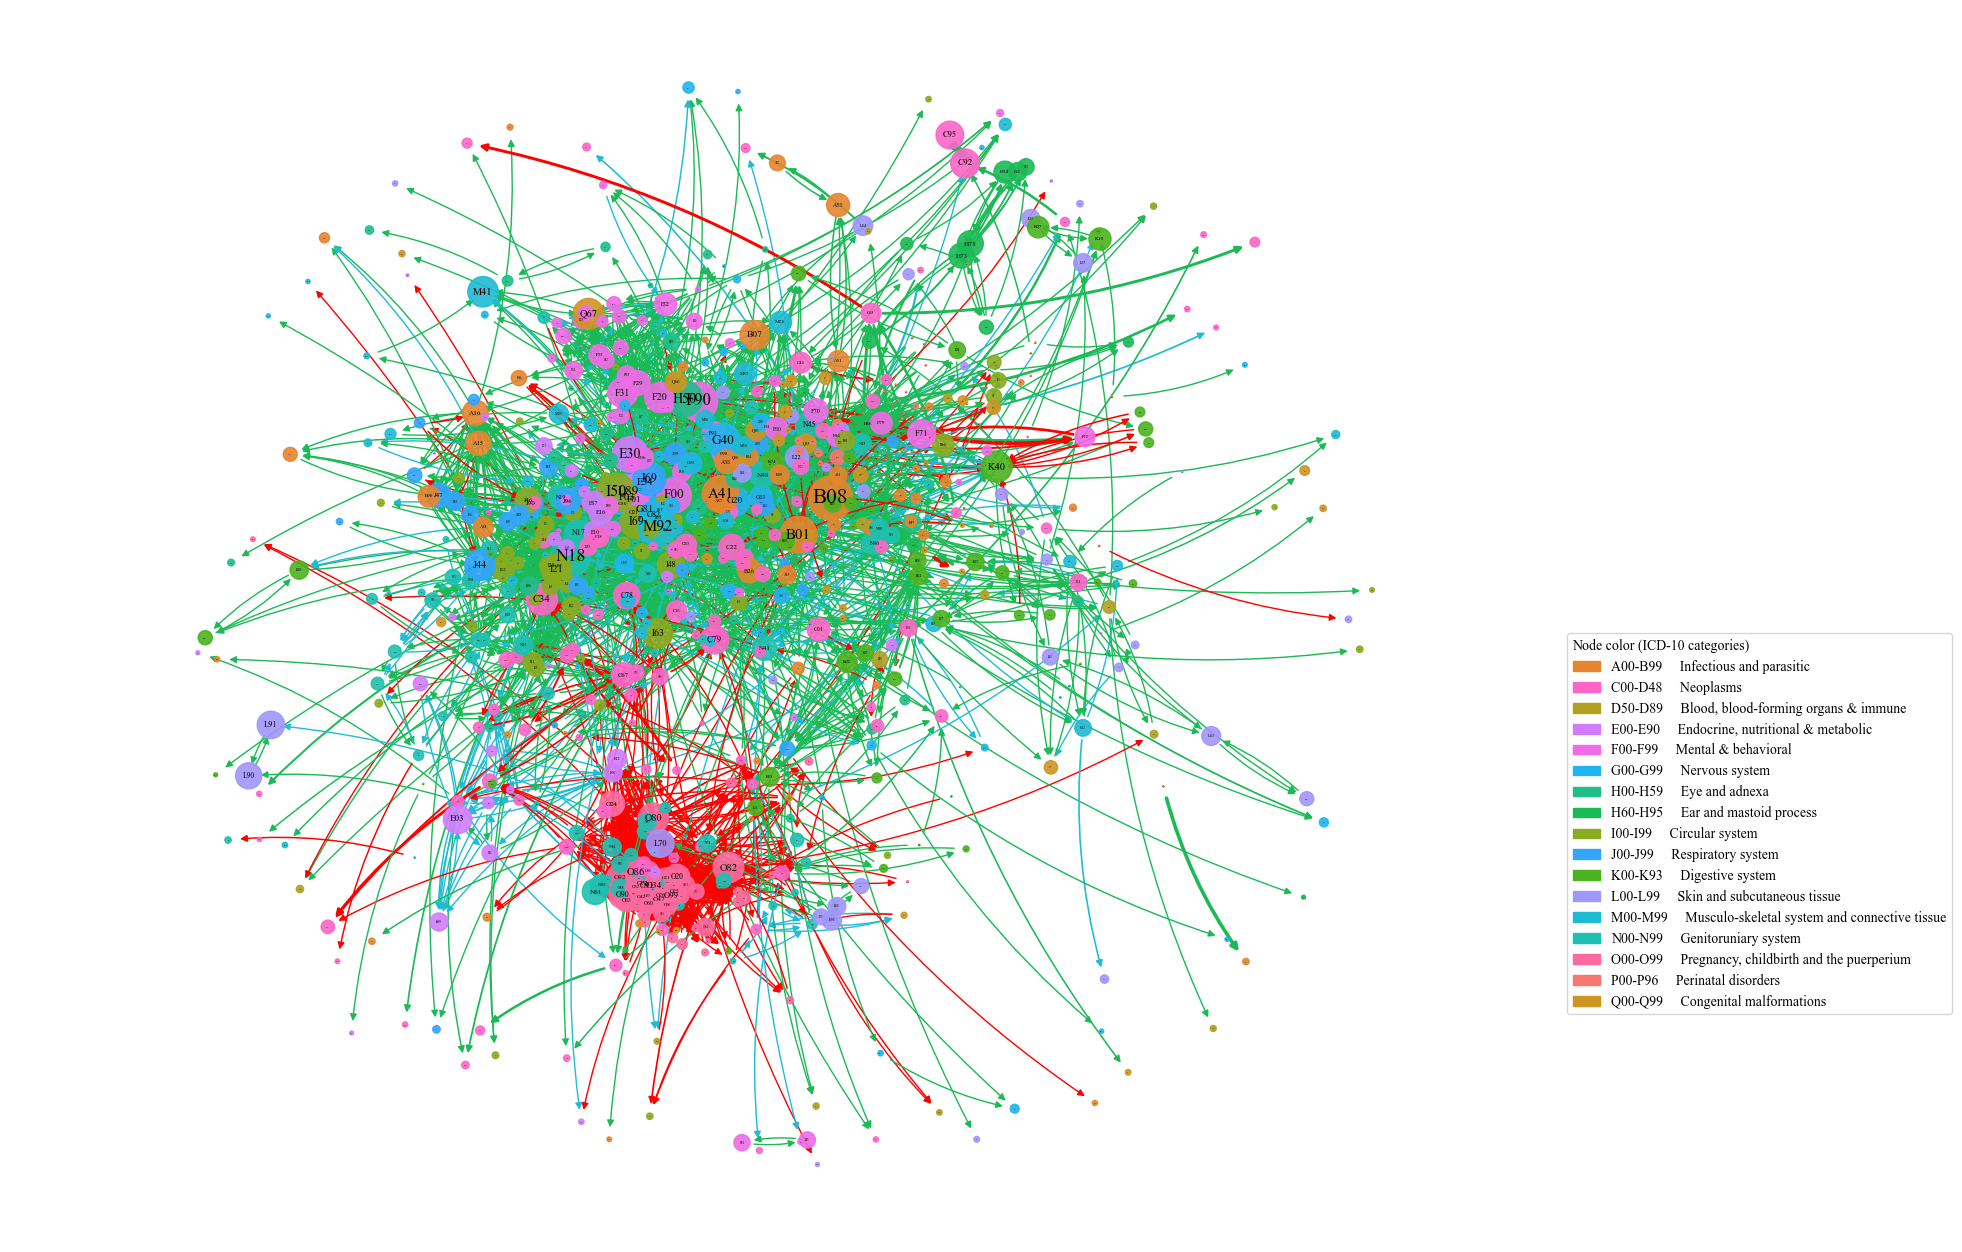

In [24]:
plt.figure(figsize=(20, 16))
plt.margins(x=0.1, y=0.02)

## 노드의 position 지정
## DPN 논문에는 force directed layout으로 지정됨
## Networkx에서 force directed layout와 동일한 spring layout 사용 
pos = nx.spring_layout(G, k=0.13) #0.13
# pos = nx.spring_layout(G, k=0.13)
# pos = nx.kamada_kawai_layout(G)

# node 그리기
nx.draw_networkx_nodes(G, pos=pos,
                                                    node_color=list(nx.get_node_attributes(G, 'color').values()),
                                                    node_size=list(nx.get_node_attributes(G, 'Norm_size').values()),
                                                    alpha=0.9)
for node, (x, y) in pos.items(): # 노드의 크기에 따라 레이블 폰트 사이즈 조절
    plt.text(x, y, node, fontsize=G.nodes[node]['Norm_size'] / 65, ha='center', va='center')

# edge 그리기
weights = list(nx.get_edge_attributes(G,'Norm_Relative_Risk').values())
edge_color =list(nx.get_edge_attributes(G,'color').values())
nx.draw_networkx_edges(G, pos, width=weights, edge_color=edge_color, connectionstyle='arc3, rad=0.1')

# plt.tight_layout()
plt.legend(handles=[mpatches.Patch(color= i, label=j) for i, j in zip(color_map, color_label)], bbox_to_anchor=(1, 0.5), title='Node color (ICD-10 categories)', alignment='left')
plt.axis('off')  # turn off axis
plt.show()
# plt.savefig('../Output/Figures/output'+ str(i) + '.png', bbox_inches = 'tight')

노드의 in, out-degree

In [16]:
for node in G.nodes:
    G.nodes[node]['all_degree'] = G.degree(node)
    G.nodes[node]['in_degree'] = G.in_degree(node)
    G.nodes[node]['out_degree'] = G.out_degree(node)
G.nodes(data=True)

NodeDataView({'N03': {'color': '#1EC0B1', 'size': 0.0013896873219879113, 'Norm_size': 122.61969227019593, 'all_degree': 16, 'in_degree': 8, 'out_degree': 8}, 'N02': {'color': '#1EC0B1', 'size': 0.001301547270241205, 'Norm_size': 113.38859136926708, 'all_degree': 17, 'in_degree': 7, 'out_degree': 10}, 'C64': {'color': '#FD66C7', 'size': 0.0013197275936513183, 'Norm_size': 115.29265650746966, 'all_degree': 15, 'in_degree': 6, 'out_degree': 9}, 'C34': {'color': '#FD66C7', 'size': 0.004954918389974404, 'Norm_size': 496.01416018233266, 'all_degree': 55, 'in_degree': 24, 'out_degree': 31}, 'H35': {'color': '#1EBF89', 'size': 0.0014231853929897675, 'Norm_size': 126.12801870382735, 'all_degree': 22, 'in_degree': 8, 'out_degree': 14}, 'H30': {'color': '#1EBF89', 'size': 0.0010579402509329823, 'Norm_size': 87.87509403355946, 'all_degree': 12, 'in_degree': 6, 'out_degree': 6}, 'D68': {'color': '#B2A022', 'size': 0.0014749625039357176, 'Norm_size': 131.55074907473974, 'all_degree': 14, 'in_degree'

In [17]:
df_DegreeOfDiagnosis = pd.DataFrame({'Diagnosis(ICD-10)': [node for node in G.nodes], 
                                                                        'all_degree': list(nx.get_node_attributes(G, 'all_degree').values()),
                                                                        'out_degree':  list(nx.get_node_attributes(G, 'out_degree').values()),
                                                                        'in_degree': list(nx.get_node_attributes(G, 'in_degree').values())})
df_DegreeOfDiagnosis

,Diagnosis(ICD-10),all_degree,out_degree,in_degree
0,N03,16,8,8
1,N02,17,10,7
2,C64,15,9,6
3,C34,55,31,24
4,H35,22,14,8
...,...,...,...,...
770,M18,1,1,0
771,H82,1,0,1
772,H55,1,0,1
773,C30,1,0,1


ICD-10 질병분류표 가져오기

In [18]:
df_ICD10 = pd.read_excel('../Data/ICD-10.xlsx')
df_ICD10

,Diagnosis(ICD-10),Diagnosis(full term)
0,A00,Cholera
1,A000,"Cholera due to Vibrio cholerae 01, biovar chol..."
2,A001,"Cholera due to Vibrio cholerae 01, biovar eltor"
3,A009,"Cholera, unspecified"
4,A01,Typhoid and paratyphoid fevers
...,...,...
41003,M9989/6,"Myelodysplastic syndrome, NOS, malignant, meta..."
41004,M9991/3,"Refractory neutropenia, malignant, primary site"
41005,M9991/6,"Refractory neutropenia, malignant, metastatic ..."
41006,M9992/3,"Refractory thrombocytopenia, malignant, primar..."


병합

In [19]:
df_DegreeOfDiagnosis = pd.merge(df_DegreeOfDiagnosis, df_ICD10, how='left', on='Diagnosis(ICD-10)')
df_DegreeOfDiagnosis = df_DegreeOfDiagnosis[['Diagnosis(ICD-10)', 'Diagnosis(full term)', 'all_degree', 'out_degree', 'in_degree']]

df_DegreeOfDiagnosis

,Diagnosis(ICD-10),Diagnosis(full term),all_degree,out_degree,in_degree
0,N03,Chronic nephritic syndrome,16,8,8
1,N02,Recurrent and persistent haematuria,17,10,7
2,C64,"Malignant neoplasm of kidney, except renal pelvis",15,9,6
3,C34,Malignant neoplasm of bronchus and lung,55,31,24
4,H35,Other retinal disorders,22,14,8
...,...,...,...,...,...
770,M18,Arthrosis of first carpometacarpal joint,1,1,0
771,H82,Vertiginous syndromes in diseases classified e...,1,0,1
772,H55,Nystagmus and other irregular eye movements,1,0,1
773,C30,Malignant neoplasm of nasal cavity and middle ear,1,0,1


상위 10개의 degree(all, in, out)를 가진 진단 테이블 생성

In [20]:
all_deg_top10= df_DegreeOfDiagnosis.nlargest(10, 'all_degree')[['Diagnosis(ICD-10)', 'Diagnosis(full term)', 'all_degree']].reset_index(drop=True)
out_deg_top10 = df_DegreeOfDiagnosis.nlargest(10, 'out_degree')[['Diagnosis(ICD-10)', 'Diagnosis(full term)', 'out_degree']].reset_index(drop=True)
in_deg_top10 = df_DegreeOfDiagnosis.nlargest(10, 'in_degree')[['Diagnosis(ICD-10)', 'Diagnosis(full term)', 'in_degree']].reset_index(drop=True)

topDegreeOfDiagnosis = pd.concat([all_deg_top10, out_deg_top10, in_deg_top10], axis=1)
topDegreeOfDiagnosis

,Diagnosis(ICD-10),Diagnosis(full term),all_degree,Diagnosis(ICD-10),Diagnosis(full term),out_degree,Diagnosis(ICD-10),Diagnosis(full term),in_degree
0,B08,Other viral infections characterized by skin a...,118,N97,Female infertility,59,B08,Other viral infections characterized by skin a...,74
1,N18,Chronic kidney disease,114,N91,"Absent, scanty and rare menstruation",58,N18,Chronic kidney disease,61
2,F00,Dementia in Alzheimer's disease (G30.-+),103,F00,Dementia in Alzheimer's disease (G30.-+),55,A41,Other sepsis,49
3,O80,Single spontaneous delivery,91,I63,Cerebral infarction,54,F00,Dementia in Alzheimer's disease (G30.-+),48
4,O20,Haemorrhage in early pregnancy,88,N18,Chronic kidney disease,53,O82,Single delivery by caesarean section,48
5,I63,Cerebral infarction,88,O20,Haemorrhage in early pregnancy,47,O80,Single spontaneous delivery,46
6,I69,Sequelae of cerebrovascular disease,87,N92,"Excessive, frequent and irregular menstruation",46,L89,Decubitus ulcer and pressure area,45
7,I50,Heart failure,86,O80,Single spontaneous delivery,45,O86,Other puerperal infections,45
8,O99,Other maternal diseases classifiable elsewhere...,83,I50,Heart failure,45,O99,Other maternal diseases classifiable elsewhere...,44
9,O82,Single delivery by caesarean section,83,B08,Other viral infections characterized by skin a...,44,O34,Maternal care for known or suspected abnormali...,43


In [21]:
# topDegreeOfDiagnosis.to_excel('../Output/Top10OfDegree.xlsx', index=False)